In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [2]:
X_train = data_train.loc[ : , data_train.columns != 'y'] 
y_train = data_train["y"]
X_test = data_test.loc[ : , data_test.columns != 'y'] 
y_test = data_test["y"]

In [3]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_train

array([[0.83216374, 0.73477207, 0.62665344, ..., 0.68119692, 0.41579666,
        0.35163009],
       [0.43401998, 0.05474146, 0.316852  , ..., 0.75188546, 0.69698565,
        0.66468976],
       [0.16747652, 0.62789514, 0.37986787, ..., 0.9424103 , 0.25048767,
        0.4017363 ],
       ...,
       [0.49248537, 0.65203595, 0.16011737, ..., 0.9232846 , 0.00627282,
        0.94884747],
       [0.25978108, 0.33781384, 0.78045381, ..., 0.65244761, 0.49482773,
        0.30744515],
       [0.04641231, 0.66828345, 0.88898616, ..., 0.25842225, 0.3173237 ,
        0.10436276]])

In [4]:
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
X_test

array([[0.32697181, 0.11039236, 0.31475833, ..., 0.72843063, 0.40642036,
        0.34837885],
       [0.13140112, 0.90876944, 0.18420903, ..., 0.92651218, 0.74628068,
        0.99547184],
       [0.76888223, 0.21291113, 0.70300468, ..., 0.49799872, 0.49523078,
        0.99461667],
       ...,
       [0.37162126, 0.02320929, 0.59091725, ..., 0.98967403, 0.86352392,
        0.21944414],
       [0.1801782 , 0.62610545, 0.86033604, ..., 0.23593573, 0.83023612,
        0.21452881],
       [0.93227783, 0.44074148, 0.588991  , ..., 0.10760565, 0.18641328,
        0.18676313]])

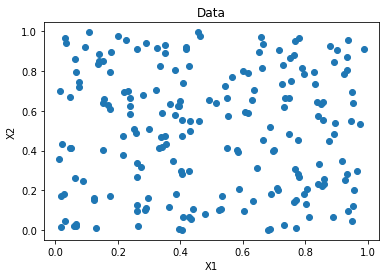

In [5]:
# Generate scatter plot for training data 
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
#Simple SVM
from sklearn import svm

In [7]:
clf = svm.SVC(probability=True)

In [8]:
clf = clf.fit(X_train, y_train)
clf.score(X_train,y_train)

0.96

Training error=0.04

In [9]:
clf.support_vectors_

array([[0.16747652, 0.62789514, 0.37986787, ..., 0.9424103 , 0.25048767,
        0.4017363 ],
       [0.91748737, 0.34986734, 0.02622274, ..., 0.26230686, 0.91762324,
        0.25235324],
       [0.76472614, 0.14423402, 0.59387821, ..., 0.14642481, 0.53775026,
        0.54391481],
       ...,
       [0.35118228, 0.88880142, 0.58187308, ..., 0.29338074, 0.74156063,
        0.47349482],
       [0.87556398, 0.44726513, 0.64753531, ..., 0.19103255, 0.24316069,
        0.39143177],
       [0.04641231, 0.66828345, 0.88898616, ..., 0.25842225, 0.3173237 ,
        0.10436276]])

In [10]:
clf.support_

array([  2,   3,   6,   8,  10,  11,  12,  13,  14,  18,  22,  23,  29,
        30,  37,  39,  41,  42,  45,  48,  49,  62,  63,  64,  65,  66,
        67,  68,  69,  74,  75,  76,  78,  79,  85,  88,  89,  90,  91,
        93,  94,  99, 103, 105, 106, 107, 108, 109, 115, 117, 119, 121,
       122, 123, 124, 126, 127, 128, 130, 132, 133, 136, 138, 143, 146,
       148, 149, 150, 151, 156, 158, 159, 161, 163, 164, 167, 168, 170,
       171, 173, 179, 184, 187, 196, 197, 198,   0,   1,   4,   7,   9,
        15,  16,  19,  21,  24,  25,  27,  31,  33,  34,  35,  36,  40,
        43,  44,  46,  47,  50,  51,  53,  54,  58,  59,  61,  70,  72,
        80,  81,  82,  84,  86,  87,  92,  95,  96,  97, 100, 102, 104,
       110, 112, 113, 114, 116, 118, 134, 135, 137, 139, 140, 142, 144,
       145, 147, 152, 153, 154, 155, 157, 160, 165, 166, 172, 175, 176,
       177, 180, 181, 182, 188, 189, 190, 191, 192, 194, 195, 199])

In [11]:
clf.n_support_

array([86, 82])

In [12]:
pred = clf.predict(X_test)
prob=clf.predict_proba(X_test)[::,1]

In [13]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, pred)) 
  
print(classification_report(y_test, pred))
accuracy_score(y_test,pred)

[[409  82]
 [101 408]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       491
           1       0.83      0.80      0.82       509

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



0.817

Misclassification error=0.18

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.86%


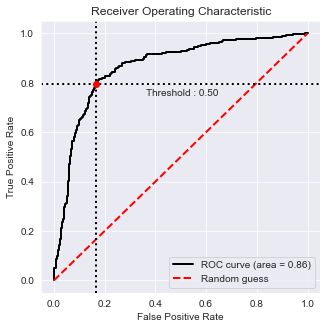

In [15]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

In [16]:
from sklearn.metrics import recall_score
recall_score(y_test,pred)

0.8015717092337917

In [17]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, pred)))

F1 Score: 0.8168168168168168


#Kernel SVM


In [18]:
#Polynomial Kernal

from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8,probability=True)
svclassifier.fit(X_train, y_train).score(X_train,y_train)

1.0

Training error=0.0

In [19]:
y_pred = svclassifier.predict(X_test)
prob=svclassifier.predict_proba(X_test)[::,1]

In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

[[402  89]
 [169 340]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       491
           1       0.79      0.67      0.72       509

    accuracy                           0.74      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000



0.742

In [21]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, y_pred)))

F1 Score: 0.7249466950959488


In [22]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.82%


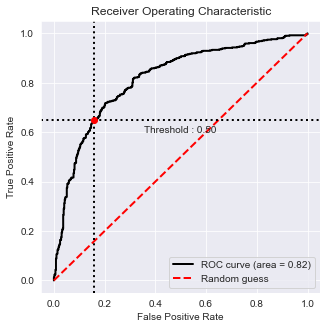

In [23]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

In [24]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.6679764243614931

In [25]:
#Gaussian Kernel

svclassifier = SVC(kernel='rbf',probability=True)
svclassifier.fit(X_train, y_train).score(X_train,y_train)

0.96

In [26]:
y_pred = svclassifier.predict(X_test)
prob=svclassifier.predict_proba(X_test)[::,1]

In [27]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

[[409  82]
 [101 408]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       491
           1       0.83      0.80      0.82       509

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



0.817

In [28]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, y_pred)))

F1 Score: 0.8168168168168168


In [29]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.86%


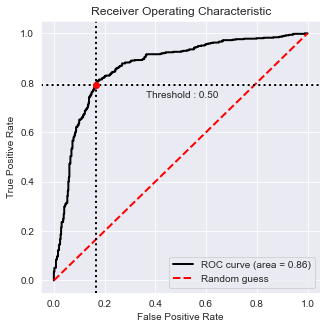

In [30]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

In [31]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.8015717092337917

In [32]:
#Sigmoid Kernel

svclassifier = SVC(kernel='sigmoid',probability=True)
svclassifier.fit(X_train, y_train).score(X_train,y_train)

0.465

In [33]:
y_pred = svclassifier.predict(X_test)
prob=svclassifier.predict_proba(X_test)[::,1]

In [34]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

[[448  43]
 [482  27]]
              precision    recall  f1-score   support

           0       0.48      0.91      0.63       491
           1       0.39      0.05      0.09       509

    accuracy                           0.48      1000
   macro avg       0.43      0.48      0.36      1000
weighted avg       0.43      0.47      0.36      1000



0.475

In [35]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, y_pred)))

F1 Score: 0.09326424870466321


In [36]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.59%


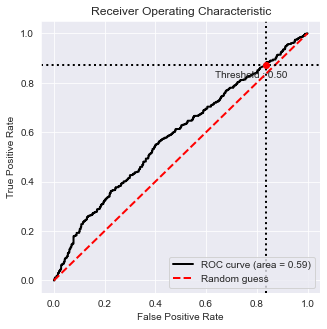

In [37]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

In [38]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.05304518664047151